In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:

# Read the CSV file
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

# Select the columns you want to work with and rename them
data = data[['Recommended IND', 'Review Text', 'Department Name',]]  # Replace 'ColumnName1' and 'ColumnName2' with the actual column names
data.columns = ['Target_Label', 'Review Text', 'Department Name']  # Rename the selected columns

data.head()


,Target_Label,Review Text,Department Name
0,1,Absolutely wonderful - silky and sexy and comf...,Intimate
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
4,1,This shirt is very flattering to all due to th...,Tops


In [3]:
print('\n ALL Data Labels')
print(data.groupby('Target_Label').count())


 ALL Data Labels
              Review Text  Department Name
Target_Label                              
0                    4101             4172
1                   18540            19300


In [4]:
missing_values = data['Review Text'].isnull().sum()

print(f"Number of missing values in 'Review Text': {missing_values}")

Number of missing values in 'Review Text': 845


In [5]:

# Delete rows with missing values in 'Review Text' column
data.dropna(subset=['Review Text', 'Department Name'], inplace=True)

# Count missing values after deletion
missing_values_after = data['Review Text'].isnull().sum()
print(f"Number of missing values in 'Review Text' after deletion: {missing_values_after}")


Number of missing values in 'Review Text' after deletion: 0


In [6]:
data.head()

,Target_Label,Review Text,Department Name
0,1,Absolutely wonderful - silky and sexy and comf...,Intimate
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
4,1,This shirt is very flattering to all due to th...,Tops


In [7]:

tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+')

# Convert 'Review Text' column to string before tokenizing
data['Review Text'] = data['Review Text'].astype(str)

# Tokenize the 'Review Text' column
data['tokenized_review'] = data['Review Text'].apply(lambda x: tokenizer.tokenize(x))


In [8]:
stop_words = nltk.corpus.stopwords.words('english')

In [9]:


# Applying lowercasing to individual words within the tokenized lists
data['cleaned_review'] = [
    [word.lower() for word in token_list if word.lower() not in stop_words]
    for token_list in data['tokenized_review']
]


In [10]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

data['lemmatized_review'] = [
    [lemmatizer.lemmatize(word) for word in token_list]
    for token_list in data['cleaned_review']
]




In [11]:
data.head()

,Target_Label,Review Text,Department Name,tokenized_review,cleaned_review,lemmatized_review
0,1,Absolutely wonderful - silky and sexy and comf...,Intimate,"[Absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,1,Love this dress! it's sooo pretty. i happene...,Dresses,"[Love, this, dress, it's, sooo, pretty, i, hap...","[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happened, find, st..."
2,0,I had such high hopes for this dress and reall...,Dresses,"[I, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init..."
3,1,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms,"[I, love, love, love, this, jumpsuit, it's, fu...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,1,This shirt is very flattering to all due to th...,Tops,"[This, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti..."


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer



sentiment= SentimentIntensityAnalyzer()

data['compound'] = [sentiment.polarity_scores(" ".join(review))['compound'] for review in data['lemmatized_review']]
data['neg'] = [sentiment.polarity_scores(" ".join(review))['neg'] for review in data['lemmatized_review']]
data['neu'] = [sentiment.polarity_scores(" ".join(review))['neu'] for review in data['lemmatized_review']]
data['pos'] = [sentiment.polarity_scores(" ".join(review))['pos'] for review in data['lemmatized_review']]


In [13]:
data.head()

,Target_Label,Review Text,Department Name,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos
0,1,Absolutely wonderful - silky and sexy and comf...,Intimate,"[Absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.8991,0.000,0.154,0.846
1,1,Love this dress! it's sooo pretty. i happene...,Dresses,"[Love, this, dress, it's, sooo, pretty, i, hap...","[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happened, find, st...",0.9710,0.000,0.514,0.486
2,0,I had such high hopes for this dress and reall...,Dresses,"[I, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init...",0.9081,0.038,0.692,0.270
3,1,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms,"[I, love, love, love, this, jumpsuit, it's, fu...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu...",0.9437,0.179,0.183,0.638
4,1,This shirt is very flattering to all due to th...,Tops,"[This, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti...",0.9062,0.000,0.494,0.506


In [14]:
data[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,0.803263,0.045398,0.567115,0.387487
std,0.270648,0.062700,0.144223,0.155308
min,-0.936100,0.000000,0.000000,0.000000
25%,0.784500,0.000000,0.478000,0.283000
50%,0.904200,0.000000,0.575000,0.378000
75%,0.951625,0.076000,0.662000,0.482000
max,0.995800,0.863000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

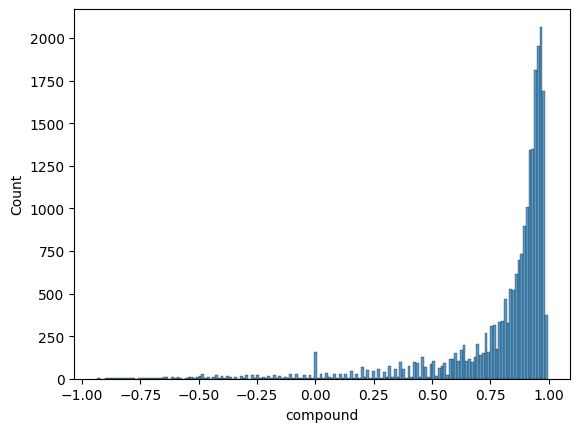

In [15]:
sns.histplot(data['compound'])

<Axes: xlabel='pos', ylabel='Count'>

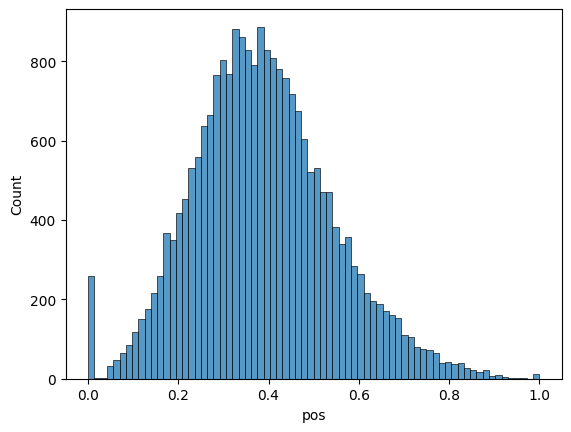

In [16]:
sns.histplot(data['pos'])

<Axes: xlabel='neg', ylabel='Count'>

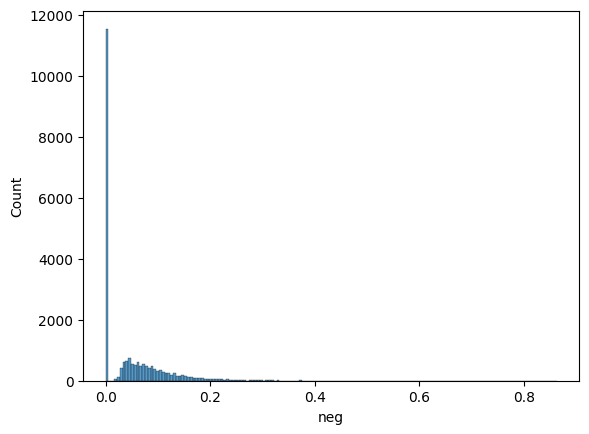

In [17]:
sns.histplot(data['neg'])

<Axes: xlabel='neu', ylabel='Count'>

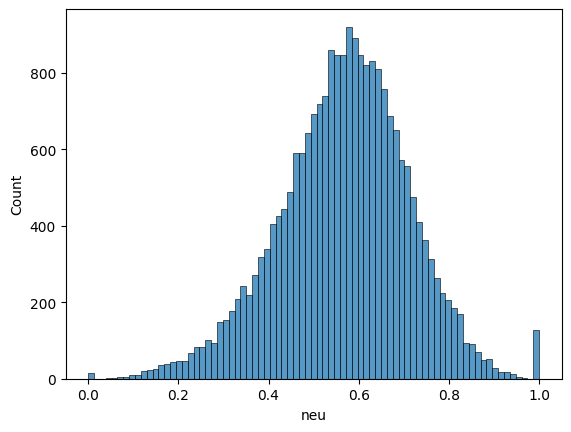

In [18]:
sns.histplot(data['neu'])

In [19]:
# count of negative reviews per product
(data['neg']<=0).groupby(data['Department Name']).sum()

Department Name
Bottoms     1856
Dresses     2900
Intimate     926
Jackets      547
Tops        5259
Trend         52
Name: neg, dtype: int64

In [20]:
percent_negative = pd.DataFrame((data['compound']<=0).groupby(data['Department Name']).sum()
                                /data['Department Name'].groupby(data['Department Name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')


percent_negative

,% negative reviews
Department Name,
Jackets,3.093812
Dresses,3.270952
Bottoms,3.276898
Tops,3.333997
Intimate,3.569268
Trend,7.627119


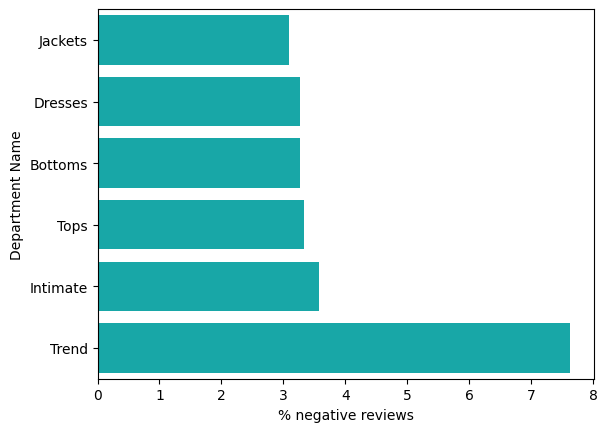

In [21]:

sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')


plt.show()

In [22]:

# Filtering positive reviews for specific classes ('Trend) with compound score > 0
reviews_positive_subset = data.loc[(data['Department Name']=='Dresses' )
                                  & (data['compound'] > 0)]

# Filtering negative reviews for specific classes (Trend) with compound score <= 0
reviews_negative_subset = data.loc[ (data['Department Name']=='Dresses' )
                                  & (data['compound'] <= 0)]


reviews_positive_subset.head()

,Target_Label,Review Text,Department Name,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos
1,1,Love this dress! it's sooo pretty. i happene...,Dresses,"[Love, this, dress, it's, sooo, pretty, i, hap...","[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happened, find, st...",0.9710,0.000,0.514,0.486
2,0,I had such high hopes for this dress and reall...,Dresses,"[I, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init...",0.9081,0.038,0.692,0.270
5,0,"I love tracy reese dresses, but this one is no...",Dresses,"[I, love, tracy, reese, dresses, but, this, on...","[love, tracy, reese, dresses, one, petite, 5, ...","[love, tracy, reese, dress, one, petite, 5, fo...",0.9153,0.000,0.738,0.262
8,1,I love this dress. i usually get an xs but it ...,Dresses,"[I, love, this, dress, i, usually, get, an, xs...","[love, dress, usually, get, xs, runs, little, ...","[love, dress, usually, get, x, run, little, sn...",0.7579,0.000,0.683,0.317
9,1,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Dresses,"[I'm, 5, 5', and, 125, lbs, i, ordered, the, s...","[i'm, 5, 5', 125, lbs, ordered, petite, make, ...","[i'm, 5, 5', 125, lb, ordered, petite, make, s...",0.9643,0.000,0.591,0.409


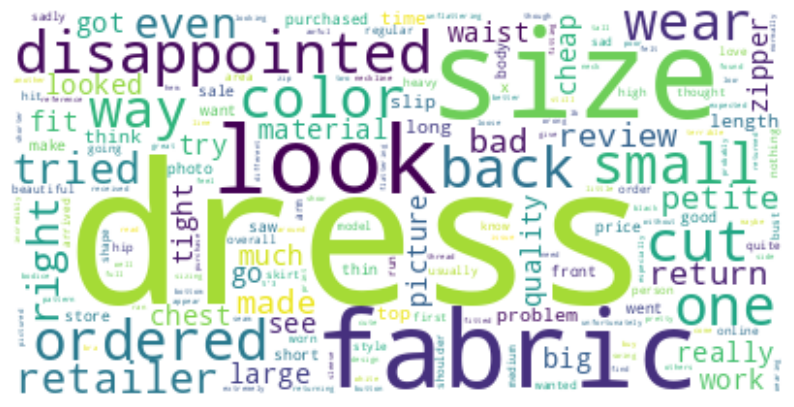

In [35]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

neg_tokens = [word for review in reviews_negative_subset['lemmatized_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

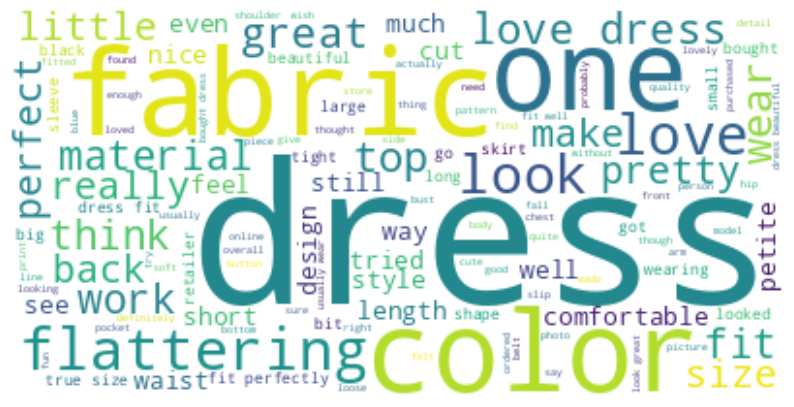

In [36]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_tokens = [word for review in reviews_positive_subset['lemmatized_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from nltk.probability import FreqDist

pos_Freqdist = FreqDist(pos_tokens)

pos_Freqdist.tabulate(10)

 dress    fit   size   love   like    i'm   look   wear  color fabric 
  9870   3022   2753   2317   1912   1850   1783   1761   1643   1618 


In [26]:
from nltk.probability import FreqDist

neg_Freqdist = FreqDist(neg_tokens)

neg_Freqdist.tabulate(10)

       dress         size       fabric          i'm         look        would         like        small         back disappointed 
         285           73           55           46           44           42           39           37           37           37 


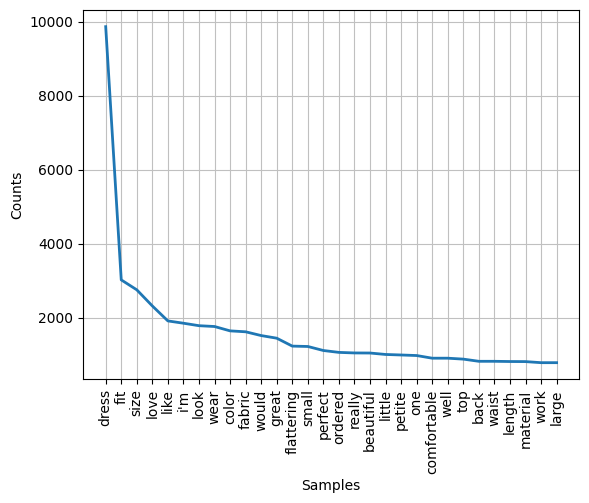

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
pos_Freqdist.plot(30)

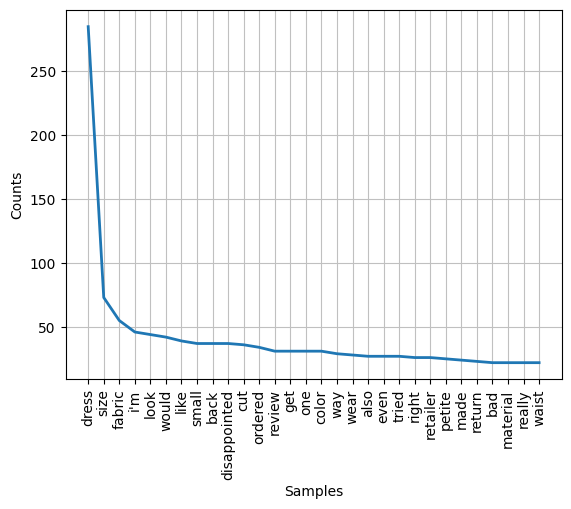

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
neg_Freqdist.plot(30)

In [29]:
# Categorizing sentiment based on thresholds
data['sentiment_label'] = 'Neutral'
data.loc[data['compound'] > 0.1, 'sentiment_label'] = 'Positive'
data.loc[data['compound'] < -0.1, 'sentiment_label'] = 'Negative'

# Count the number of reviews in each sentiment category
sentiment_counts = data['sentiment_label'].value_counts()
print(sentiment_counts)


Positive    21755
Negative      517
Neutral       356
Name: sentiment_label, dtype: int64


In [30]:
# the average sentiment score: summary of the sentiment by aggregating scores per department
average_sentiment = data.groupby('Department Name')['compound'].mean()
print(average_sentiment)


Department Name
Bottoms     0.806509
Dresses     0.807797
Intimate    0.793320
Jackets     0.808822
Tops        0.801298
Trend       0.725878
Name: compound, dtype: float64
